<a href="https://colab.research.google.com/github/mateus-neres/Machine_Learning_com_Python/blob/main/Aula_38_a_65.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APRENDIZAGEM SUPERVISIONADA: CLASSIFICAÇÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

# **38.PRÉ-PROCESSAMENTO DOS DADOS: VARIÁVEIS CATEGÓRICAS**

# **PRÉ-PROCESSAMENTO**

In [82]:
import pandas as pd
import numpy as np

In [83]:
df = pd.read_csv('/content/drive/MyDrive/curso_Udemy/Machine_Learning_com_Python/heart_tratado.csv', sep = ';', encoding = 'utf-8')

In [84]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [85]:
df.shape

(917, 12)

In [86]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## **Transformando as variáveis categóricas nominais em variáveis categóricas ordinais**

In [87]:
df2 = pd.DataFrame.copy(df)

In [88]:
df2.Sex.replace({'M':0, 'F':1}, inplace=True)
df2.ChestPainType.replace({'TA':0, 'ATA':1, 'NAP':2, "ASY":3}, inplace=True)
df2.RestingECG.replace({'Normal':0, 'ST':1, 'LVH':3}, inplace=True)
df2.ExerciseAngina.replace({'N':0, 'Y':1}, inplace=True)
df2.ST_Slope.replace({'Up':0, 'Flat':1, 'Down':3}, inplace=True)



In [89]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [90]:
df2.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [91]:
df2.shape

(917, 12)

## **LEGENDA**

Age = idade (anos)

Sex = sexo (0=M; 1=F)

Chest Pain Type = tipo de dor no peito (0=TA:angina típica; 1=ATA:angina atípica; 2=NAP:dor não anginosa; 3=ASY:assintomático)

Resting BP = pressão sanguínea em repouso (mmHg)

Cholesterol = colesterol sérico (mg/dl)

Fasting BS = açúcar no sangue em jejum (mg/dl)
          0: Fasting BS < 120 mg/dl (não diabético)
          1: Fasting BS >= 120 mg/dl, (diabético)

Resting ECG = eletrocardiograma em repouso (0=Normal; 1=ST:Anormalidade da onda ST-T; 2=LVH: Hipertrofia ventricular esquerda)

Max HR = frequência cardíaca máxima

Exercise Angina = Angina induzida por exercício (0=Não; 1=Sim)

Old Peak = Depressão de ST induzida por exercício em relação ao repouso

ST_Slope = Inclinação do segmento ST (0=UP; 1=Flat; 2=Down)

Heart Disease = Doença cardíaca (0=Não possui doença cardíaca; 1=Possui doença cardíaca)



# **39.PRÉ-PROCESSAMENTO: ESCALONAMENTO E SEPARAÇÃO DE VARIAVEIS**

## **ATRIBUTOS PREVISORES E ALVO**

In [92]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [93]:
previsores = df2.iloc[:,0:11].values

In [94]:
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [95]:
previsores.shape

(917, 11)

In [96]:
alvo = df2.iloc[:,11].values

In [97]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

## **Análise das escalas dos atributos (Escalonamento)**

In [98]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Padronização (utiliza a média e o desvio padrão como referência).

Normalização (utiliza os valores máximo e mínimo como referência).

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [101]:
previsores_esc

array([[-1.43220634, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -0.89780493],
       [-0.47805725,  1.9368261 , -0.27058012, ..., -0.82431012,
         0.10625149,  0.37269989],
       [-1.75025603, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -0.89780493],
       ...,
       [ 0.37007527, -0.51630861,  0.80354095, ...,  1.21313565,
         0.29380223,  0.37269989],
       [ 0.37007527,  1.9368261 , -1.34470119, ..., -0.82431012,
        -0.83150225,  0.37269989],
       [-1.64423947, -0.51630861, -0.27058012, ..., -0.82431012,
        -0.83150225, -0.89780493]])

In [102]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10
0,-1.432206,-0.516309,-1.344701,0.414627,0.832075,-0.551733,-0.687678,1.383339,-0.824310,-0.831502,-0.897805
1,-0.478057,1.936826,-0.270580,1.526360,-1.212261,-0.551733,-0.687678,0.754736,-0.824310,0.106251,0.372700
2,-1.750256,-0.516309,-1.344701,-0.141240,0.719543,-0.551733,0.162188,-1.523953,-0.824310,-0.831502,-0.897805
3,-0.584074,1.936826,0.803541,0.303453,-0.574578,-0.551733,-0.687678,-1.131075,1.213136,0.575128,0.372700
4,0.052026,-0.516309,-0.270580,0.970493,-0.930931,-0.551733,-0.687678,-0.581047,-0.824310,-0.831502,-0.897805
5,-1.538223,-0.516309,-0.270580,-0.697106,1.769844,-0.551733,-0.687678,1.304764,-0.824310,-0.831502,-0.897805
6,-0.902124,1.936826,-1.344701,-0.141240,-0.143205,-0.551733,-0.687678,1.304764,-0.824310,-0.831502,-0.897805
7,0.052026,-0.516309,-1.344701,-1.252973,-0.687111,-0.551733,-0.687678,0.204708,-0.824310,-0.831502,-0.897805
8,-1.750256,-0.516309,0.803541,0.414627,-0.705866,-0.551733,-0.687678,-0.266745,1.213136,0.575128,0.372700
9,-0.584074,1.936826,-1.344701,-0.697106,0.738298,-0.551733,-0.687678,-0.659623,-0.824310,-0.831502,-0.897805


In [103]:
previsoresdf.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000
mean,1.859654e-16,7.748558e-18,1.046055e-16,7.767929e-16,-1.869340e-16,4.649135e-17,6.198846e-17,-5.114048e-16,-1.046055e-16,7.748558e-17,0.000000
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546
min,-2.704405e+00,-5.163086e-01,-2.418822e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-6.876782e-01,-3.016886e+00,-8.243101e-01,-3.269662e+00,-0.897805
25%,-6.900904e-01,-5.163086e-01,-2.705801e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-6.876782e-01,-6.596226e-01,-8.243101e-01,-8.315022e-01,-0.897805
50%,5.202558e-02,-5.163086e-01,8.035410e-01,-1.412398e-01,0.000000e+00,-5.517333e-01,-6.876782e-01,4.755658e-02,-8.243101e-01,-2.688500e-01,0.372700
75%,6.881250e-01,-5.163086e-01,8.035410e-01,4.146267e-01,4.194568e-01,-5.517333e-01,1.621883e-01,7.547357e-01,1.213136e+00,5.751284e-01,0.372700
max,2.490407e+00,1.936826e+00,8.035410e-01,3.749826e+00,6.721265e+00,1.812470e+00,1.861921e+00,2.561971e+00,1.213136e+00,4.982571e+00,2.913710


# **40.PRÉ-PROCESSAMENTO: LABELENCODER**

## **Codificação de variáveis categóricas**

### **LabelEncoder: transformação de variáveis categóricas em numéricas**


In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [106]:
previsores2 = df.iloc[:,0:11].values
previsores2

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [107]:
df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0


In [110]:
previsores2[:,1] = LabelEncoder().fit_transform(previsores[:,1])
previsores2[:,2] = LabelEncoder().fit_transform(previsores[:,2])
previsores2[:,6] = LabelEncoder().fit_transform(previsores[:,6])
previsores2[:,8] = LabelEncoder().fit_transform(previsores[:,8])
previsores2[:,10] = LabelEncoder().fit_transform(previsores[:,10])

In [112]:
previsores2

array([[40, 0, 1, ..., 0, 0.0, 0],
       [49, 1, 2, ..., 0, 1.0, 1],
       [37, 0, 1, ..., 0, 0.0, 0],
       ...,
       [57, 0, 3, ..., 1, 1.2, 1],
       [57, 1, 1, ..., 0, 0.0, 1],
       [38, 0, 2, ..., 0, 0.0, 0]], dtype=object)

### **OneHotEncoder: Criação de variáveis Dummy (fictícia).**

Cuidado com a multicolinearidade (variáveis altamente correlacionadas entre si).

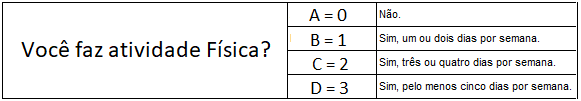

A   B   C   D   
1   0   0   0   
0   1   0   0   
0   0   1   0   
0   0   0   1


In [114]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [115]:
ColumnTransformer?

Parâmetros ColumnTransformer
- name: nome dado a transformação.
- transformer: tipo de estimador (OneHotEncoder).
- columns: colunas que serão transformadas.
- remainder: o que acontecerá com o restante das colunas não relacionadas:
1) drop = exclui as outras colunas.
2) passthrough = mantém as outras colunas. drop é default.  
- sparse_threshold: parâmetro de classificação de matrizes esparsas. default é 0.3
- n_jobs: número de trabalhos a serem executados em paralelo. default é nenhum
- transformer_weights: definição de pesos aos transformadores.
-verbose: default é False. se for True a execução é apresentada na tela.

In [117]:
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                                remainder='passthrough').fit_transform(previsores2)

In [118]:
previsores3

array([[1.0, 0.0, 0.0, ..., 0, 172, 0.0],
       [0.0, 1.0, 0.0, ..., 0, 156, 1.0],
       [1.0, 0.0, 0.0, ..., 0, 98, 0.0],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 115, 1.2],
       [0.0, 1.0, 0.0, ..., 0, 174, 0.0],
       [1.0, 0.0, 0.0, ..., 0, 173, 0.0]], dtype=object)

In [119]:
previsores3.shape

(917, 20)

In [121]:
previsores3df = pd.DataFrame(previsores3)
previsores3df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,40,140,289.0,0,172,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,160,180.0,0,156,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,37,130,283.0,0,98,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,48,138,214.0,0,108,1.5
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,54,150,195.0,0,122,0.0


In [122]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


## **Escalonamento**

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
previsores3_esc = StandardScaler().fit_transform(previsores3)

In [126]:
previsores3_esc

array([[ 0.51630861, -0.51630861, -0.22981048, ..., -0.55173333,
         1.38333943, -0.83150225],
       [-1.9368261 ,  1.9368261 , -0.22981048, ..., -0.55173333,
         0.75473573,  0.10625149],
       [ 0.51630861, -0.51630861, -0.22981048, ..., -0.55173333,
        -1.52395266, -0.83150225],
       ...,
       [ 0.51630861, -0.51630861, -0.22981048, ..., -0.55173333,
        -0.85606123,  0.29380223],
       [-1.9368261 ,  1.9368261 , -0.22981048, ..., -0.55173333,
         1.46191489, -0.83150225],
       [ 0.51630861, -0.51630861, -0.22981048, ..., -0.55173333,
         1.42262716, -0.83150225]])

In [128]:
previsores3df = pd.DataFrame(previsores3_esc)
previsores3df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.516309,-0.516309,-0.22981,2.073784,-0.531524,-1.085425,0.815013,-0.490781,-0.507826,0.824310,-0.824310,1.149573,-1.001091,-0.271607,-1.432206,0.414627,0.832075,-0.551733,1.383339,-0.831502
1,-1.936826,1.936826,-0.22981,-0.482210,1.881384,-1.085425,0.815013,-0.490781,-0.507826,0.824310,-0.824310,-0.869888,0.998910,-0.271607,-0.478057,1.526360,-1.212261,-0.551733,0.754736,0.106251
2,0.516309,-0.516309,-0.22981,2.073784,-0.531524,-1.085425,-1.226974,2.037569,-0.507826,0.824310,-0.824310,1.149573,-1.001091,-0.271607,-1.750256,-0.141240,0.719543,-0.551733,-1.523953,-0.831502
3,-1.936826,1.936826,-0.22981,-0.482210,-0.531524,0.921298,0.815013,-0.490781,-0.507826,-1.213136,1.213136,-0.869888,0.998910,-0.271607,-0.584074,0.303453,-0.574578,-0.551733,-1.131075,0.575128
4,0.516309,-0.516309,-0.22981,-0.482210,1.881384,-1.085425,0.815013,-0.490781,-0.507826,0.824310,-0.824310,1.149573,-1.001091,-0.271607,0.052026,0.970493,-0.930931,-0.551733,-0.581047,-0.831502


In [129]:
previsores3df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,-1.472226e-16,1.084798e-16,6.973702e-17,-3.874279e-17,3.874279e-17,1.937139e-17,-9.298269e-17,1.549712e-17,0.000000,-4.261707e-17,4.261707e-17,-3.874279e-17,0.000000,8.523413e-17,1.859654e-16,7.884157e-16,3.014189e-15,-1.549712e-17,-5.114048e-16,-1.859654e-16
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-1.936826e+00,-5.163086e-01,-2.298105e-01,-4.822104e-01,-5.315237e-01,-1.085425e+00,-1.226974e+00,-4.907810e-01,-0.507826,-1.213136e+00,-8.243101e-01,-8.698879e-01,-1.001091,-2.716072e-01,-2.704405e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-3.016886e+00,-3.269662e+00
25%,5.163086e-01,-5.163086e-01,-2.298105e-01,-4.822104e-01,-5.315237e-01,-1.085425e+00,-1.226974e+00,-4.907810e-01,-0.507826,-1.213136e+00,-8.243101e-01,-8.698879e-01,-1.001091,-2.716072e-01,-6.900904e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-6.596226e-01,-8.315022e-01
50%,5.163086e-01,-5.163086e-01,-2.298105e-01,-4.822104e-01,-5.315237e-01,9.212982e-01,8.150134e-01,-4.907810e-01,-0.507826,8.243101e-01,-8.243101e-01,-8.698879e-01,0.998910,-2.716072e-01,5.202558e-02,-1.412398e-01,3.198360e-15,-5.517333e-01,4.755658e-02,-2.688500e-01
75%,5.163086e-01,-5.163086e-01,-2.298105e-01,-4.822104e-01,-5.315237e-01,9.212982e-01,8.150134e-01,-4.907810e-01,-0.507826,8.243101e-01,1.213136e+00,1.149573e+00,0.998910,-2.716072e-01,6.881250e-01,4.146267e-01,4.194568e-01,-5.517333e-01,7.547357e-01,5.751284e-01
max,5.163086e-01,1.936826e+00,4.351412e+00,2.073784e+00,1.881384e+00,9.212982e-01,8.150134e-01,2.037569e+00,1.969177,8.243101e-01,1.213136e+00,1.149573e+00,0.998910,3.681787e+00,2.490407e+00,3.749826e+00,6.721265e+00,1.812470e+00,2.561971e+00,4.982571e+00


In [130]:
previsores3df.mean()

0     2.962613e-16
1    -2.985616e-16
2     2.330015e-16
3    -8.105718e-16
4     1.117003e-15
5    -8.034286e-16
6    -4.690299e-16
7    -4.492953e-16
8    -3.319531e-15
9     8.402342e-17
10   -8.402342e-17
11   -9.661483e-17
12   -4.561963e-16
13   -1.212649e-15
14    1.050172e-15
15    7.537288e-16
16    3.070850e-15
17   -9.930261e-16
18   -4.881591e-16
19   -1.234926e-17
dtype: float64